In [28]:
# Imports
import keras
from keras.applications.xception import Xception, decode_predictions, preprocess_input
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, Flatten
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [29]:
# Load data
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = data_generator.flow_from_directory("img/train", target_size=(299,299), batch_size=16)

Found 320 images belonging to 4 classes.


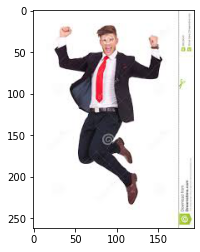

In [30]:
# Shows image
img = Image.open("./img/train/happy person/pic20.png")
plt.imshow(np.array(img))

In [31]:
xception = Xception(weights="imagenet")

In [32]:
xception.summary()

0][0]            
__________________________________________________________________________________________________
block5_sepconv2_act (Activation (None, 19, 19, 728)  0           block5_sepconv1_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, 19, 19, 728)  536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 19, 19, 728)  0           block5_sepconv2_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv3 (SeparableConv2 (None, 19, 19, 728)  536536      block5_sepconv3_act[0][0] 

In [33]:
# Removes last layer of model
last_layer = xception.get_layer("avg_pool")

xception_layers = keras.Model(inputs=xception.input, outputs=last_layer.output)
xception_layers.summary()

act[0][0]        
__________________________________________________________________________________________________
block5_sepconv1_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv1[0][0]            
__________________________________________________________________________________________________
block5_sepconv2_act (Activation (None, 19, 19, 728)  0           block5_sepconv1_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, 19, 19, 728)  536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 19, 19, 728)  0           block5_sepconv2_bn[0][0]  

In [38]:
feature_model = Sequential()
feature_model.add(xception_layers)
feature_model.add(Dense(4, activation="softmax"))

feature_model.layers[0].trainable = False

feature_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

feature_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_5 (Model)              (None, 2048)              20861480  
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 8196      
Total params: 20,869,676
Trainable params: 8,196
Non-trainable params: 20,861,480
_________________________________________________________________


In [39]:
feature_model.fit(train_set, epochs=10)

Epoch 1/10
20/20 [==============================] - 173s 9s/step - loss: 1.3708 - accuracy: 0.3031
Epoch 2/10
20/20 [==============================] - 172s 9s/step - loss: 1.1664 - accuracy: 0.5344
Epoch 3/10
20/20 [==============================] - 172s 9s/step - loss: 1.0537 - accuracy: 0.5844
Epoch 4/10
20/20 [==============================] - 171s 9s/step - loss: 0.9877 - accuracy: 0.6438
Epoch 5/10
20/20 [==============================] - 172s 9s/step - loss: 0.9340 - accuracy: 0.6781
Epoch 6/10
20/20 [==============================] - 166s 8s/step - loss: 0.8922 - accuracy: 0.6844
Epoch 7/10
20/20 [==============================] - 153s 8s/step - loss: 0.8357 - accuracy: 0.7094
Epoch 8/10
20/20 [==============================] - 144s 7s/step - loss: 0.8027 - accuracy: 0.7188
Epoch 9/10
20/20 [==============================] - 143s 7s/step - loss: 0.7501 - accuracy: 0.7750
Epoch 10/10
20/20 [==============================] - 144s 7s/step - loss: 0.6996 - accuracy: 0.8125


array([[0.23740621, 0.12879382, 0.59756774, 0.03623229]], dtype=float32)

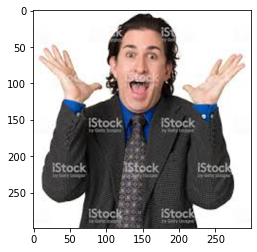

In [45]:
image = Image.open("./img/train/happy person/pic25.png")
image = np.array(image.resize((299, 299)))
img = image.reshape(1, 299, 299, 3)
img = preprocess_input(img)
plt.imshow(image)
feature_model.predict(img)

In [55]:
# Save model
feature_model.save("model_weights.h5")

with open("model_architecture.json", "w") as f:
    f.write(feature_model.to_json())

In [51]:
banana = keras.models.load_model("my_model.h5")

array([[0.4648186 , 0.1576206 , 0.31182316, 0.06573772]], dtype=float32)

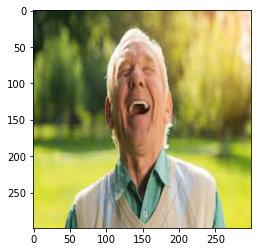

In [53]:
image = Image.open("./img/train/happy person/pic11.png")
image = np.array(image.resize((299, 299)))
img = image.reshape(1, 299, 299, 3)
img = preprocess_input(img)
plt.imshow(image)
banana.predict(img)